In [1]:
%matplotlib inline
from obspy.core import read
from obspy.core import UTCDateTime
from ykolutils.signalprocessing.fft import simplefft
import pandas as pd
import numpy as np
from scipy.signal import detrend
from scipy import signal
from scipy.signal import filter_design as fd
import datetime


import matplotlib.pylab as plt

In [2]:
stats_100_1000 = pd.io.parsers.read_csv('D:\\Work\\PythonExp\\InfluxdbTest\\stats_100_1000.log',
                                       sep=',',
                                       skiprows=5,
                                       index_col=0,
                                       parse_dates=True,
                                       names=['Num_of_points','Shard_size', 'Raft_size'])
stats_10_1000 = pd.io.parsers.read_csv('D:\\Work\\PythonExp\\InfluxdbTest\\stats_10_1000.log',
                                       sep=',',
                                       skiprows=5,
                                       index_col=0,
                                       parse_dates=True,
                                       names=['Num_of_points','Shard_size', 'Raft_size'])

In [3]:
stats_100_1000.head()


,Num_of_points,Shard_size,Raft_size
2015-06-01 19:18:21,0,0.035156,0.050781
2015-06-01 19:18:23,7000,0.597656,0.566406
2015-06-01 19:19:37,712000,64.246094,278.597656
2015-06-01 19:20:51,1471000,141.605469,562.203125
2015-06-01 19:22:08,2233000,216.296875,840.832031


In [4]:
stats_10_1000.head()

,Num_of_points,Shard_size,Raft_size
2015-06-01 19:50:29,0,1890.476562,3826.312500
2015-06-01 19:50:30,0,1890.781250,3826.312500
2015-06-01 19:51:31,290000,1950.644531,3994.468750
2015-06-01 19:52:33,582000,2008.929688,4180.324219
2015-06-01 19:53:35,880000,2069.500000,4168.078125


In [5]:
def shift_points(dataframe):
    dataframe['Shard_size'] = dataframe['Shard_size'] - dataframe['Shard_size'][0]
    dataframe['Raft_size'] = dataframe['Raft_size'] - dataframe['Raft_size'][0]
    return dataframe
    

def shift_index(dataframe):
    dataframe.index = dataframe.index.astype(np.int64) // 10**9
    dataframe=dataframe.shift(periods=1, freq=-dataframe.index[0])
    return dataframe

In [6]:
# Shifting indices
stats_100_1000 = shift_index(stats_100_1000)
stats_10_1000 = shift_index(stats_10_1000)



#Shifting points
stats_100_1000 = shift_points(stats_100_1000)
stats_10_1000 = shift_points(stats_10_1000)




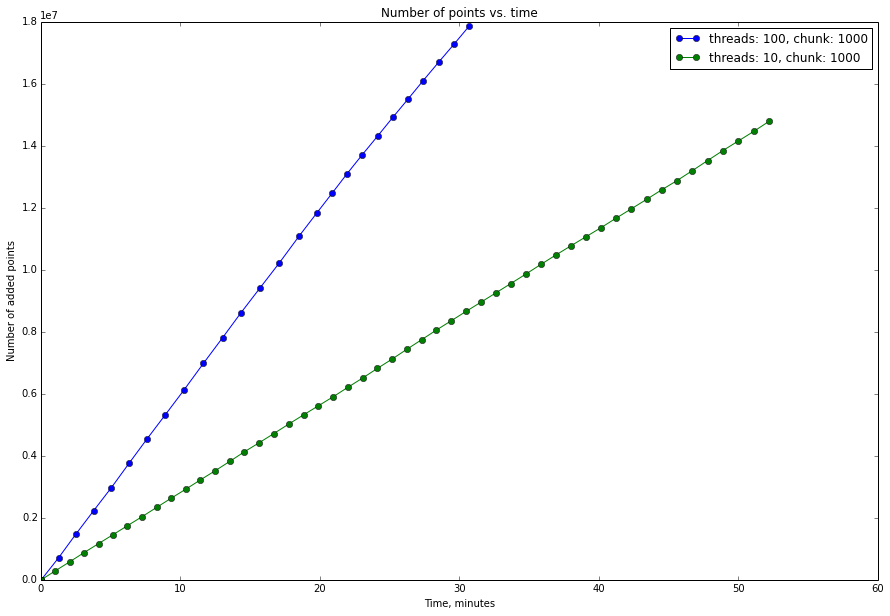

In [7]:
plt.figure(figsize=(15,10))
plt.plot(stats_100_1000.index/60, stats_100_1000['Num_of_points'], '-o', label='threads: 100, chunk: 1000')
plt.plot(stats_10_1000.index/60, stats_10_1000['Num_of_points'],'-o', label='threads: 10, chunk: 1000')

plt.legend()

plt.xlabel('Time, minutes')
plt.ylabel('Number of added points')
plt.title('Number of points vs. time')

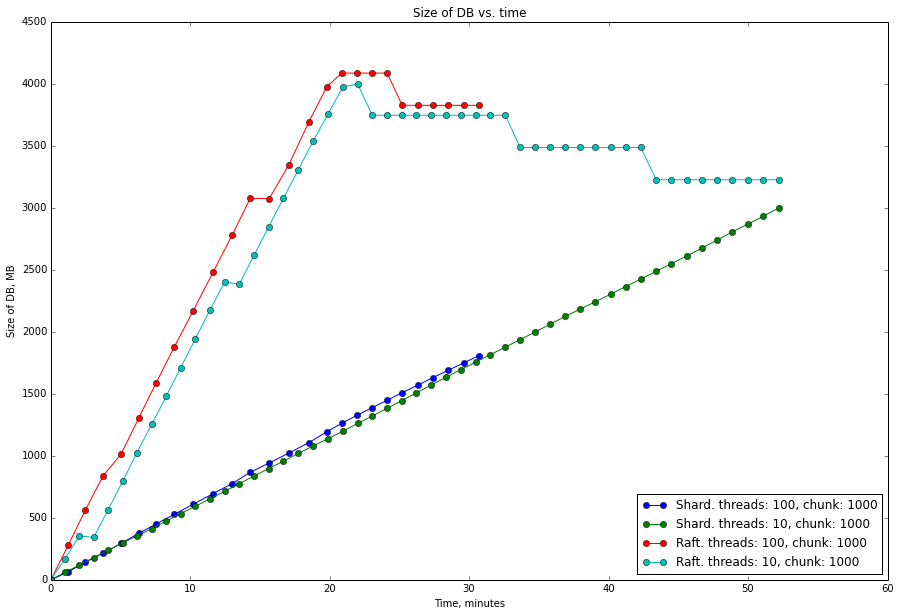

In [11]:
plt.figure(figsize=(15,10))
plt.plot(stats_100_1000.index/60, stats_100_1000['Shard_size'], '-o', label='Shard. threads: 100, chunk: 1000')
plt.plot(stats_10_1000.index/60, stats_10_1000['Shard_size'],'-o', label='Shard. threads: 10, chunk: 1000')

plt.plot(stats_100_1000.index/60, stats_100_1000['Raft_size'], '-o', label='Raft. threads: 100, chunk: 1000')
plt.plot(stats_10_1000.index/60, stats_10_1000['Raft_size'],'-o', label='Raft. threads: 10, chunk: 1000')

plt.legend(loc='lower right')

plt.xlabel('Time, minutes')
plt.ylabel('Size of DB, MB')
plt.title('Size of DB vs. time')

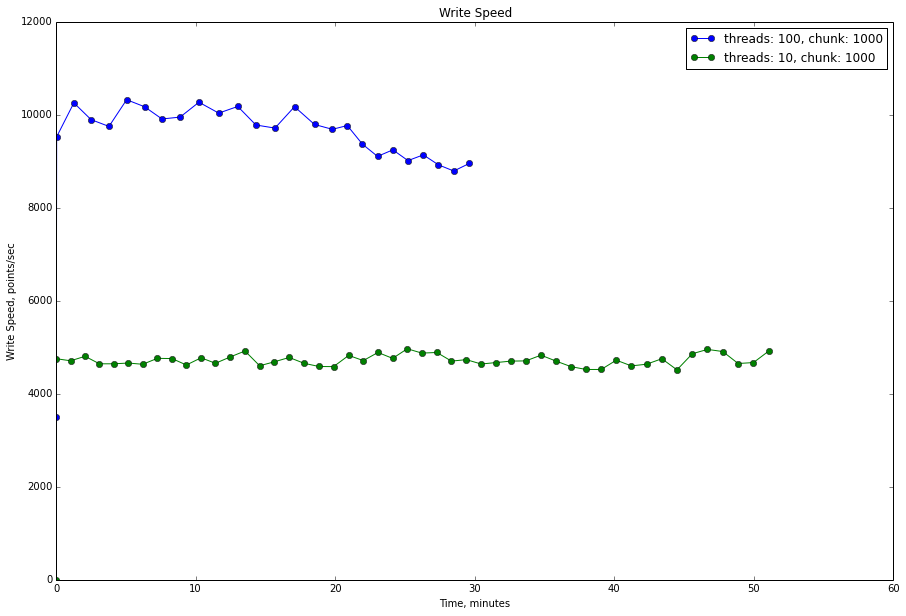

In [12]:
v_100_1000 = np.diff(stats_100_1000['Num_of_points']) / np.diff(stats_100_1000.index)
v_10_1000 = np.diff(stats_10_1000['Num_of_points']) / np.diff(stats_10_1000.index)


plt.figure(figsize=(15,10))
plt.plot(stats_100_1000.index[:-1] / 60,v_100_1000, '-o', label='threads: 100, chunk: 1000')
plt.plot(stats_10_1000.index[:-1] / 60,v_10_1000, '-o', label='threads: 10, chunk: 1000')
plt.legend()

plt.xlabel('Time, minutes')
plt.ylabel('Write Speed, points/sec')
plt.title('Write Speed')